## Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Importing Dataset

In [ ]:
dataset = pd.read_csv('merged_emotion_dataset.csv', encoding='utf-8', index_col=0)

In [ ]:
main_dataset = dataset

In [ ]:
dataset.head()

,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


## Exploratory Data Analysis

### Analyzing details of the dataset

In [ ]:
#Columns/features in data
dataset.columns

Index(['text', 'label'], dtype='object')

In [ ]:
# length of the dataset
print('length of data is', len(dataset))

length of data is 21296


In [ ]:
# shape of data
dataset.shape

(21296, 2)

In [ ]:
# data information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21296 entries, 0 to 1295
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    21296 non-null  object
 1   label   21296 non-null  object
dtypes: object(2)
memory usage: 499.1+ KB


In [ ]:
#Datatypes of all columns
dataset.dtypes

text     object
label    object
dtype: object

In [ ]:
#Rows and columns in the dataset
print('Count of columns in the data is:  ', len(dataset.columns))
print('Count of rows in the data is:  ', len(dataset))

Count of columns in the data is:   2
Count of rows in the data is:   21296


In [ ]:
#Check unique label values
dataset['label'].unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

In [ ]:
#Check the number of label values
dataset['label'].nunique()

6

In [ ]:
# distribution of the labels in dataset
dataset['label'].value_counts(normalize=True)

joy         0.317477
sadness     0.272211
love        0.137913
anger       0.127207
fear        0.111429
surprise    0.033762
Name: label, dtype: float64

In [ ]:
# checking missing value of text column
dataset['text'].isnull().sum()

0

In [ ]:
# checking missing value of labels column
dataset['label'].isnull().sum()

0

<Axes: xlabel='label', ylabel='count'>

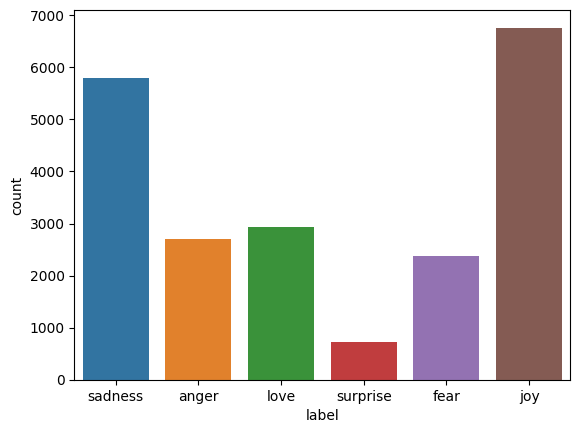

In [ ]:
sns.countplot(
    x='label',
    data=dataset
)

<Axes: title={'center': 'Distribution of data'}, xlabel='label'>

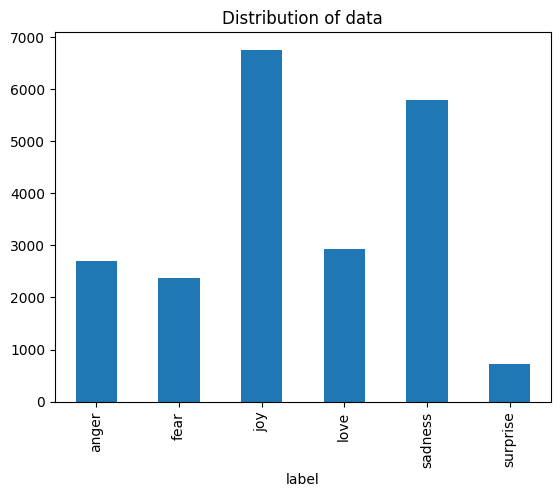

In [ ]:
# Plotting the distribution for dataset.
dataset.groupby('label').count().plot(
    kind='bar',
    title='Distribution of data',
    legend=False
)

<Axes: xlabel='label', ylabel='count'>

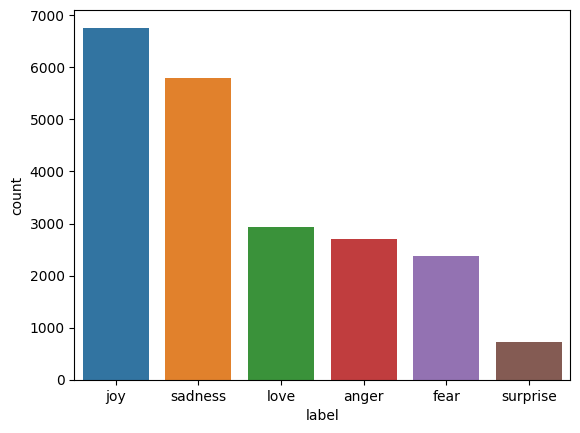

In [ ]:
sns.countplot(
    x='label',
    data=dataset,
    order=dataset['label'].value_counts(normalize=True).index
)

### Analyzing Text Statistics

<ipython-input-20-6ceaf44051b4>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['text_length'])


Text(0.5, 0, 'Text Length')

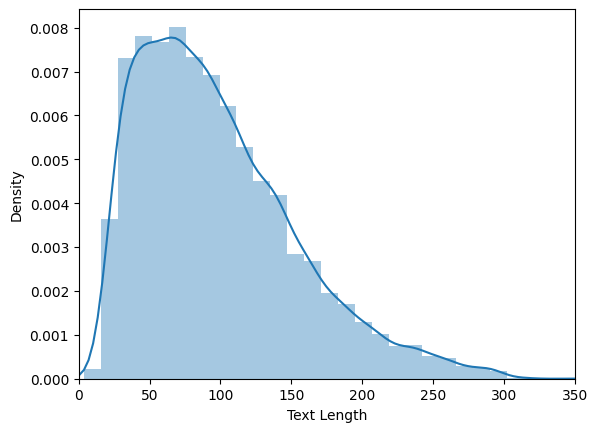

In [ ]:
dataset['text_length'] = dataset['text'].astype(str).apply(len)
dataset['text_word_count'] = dataset['text'].apply(lambda x: len(str(x).split()))
sns.distplot(dataset['text_length'])
plt.xlim([0, 350])
plt.xlabel('Text Length')

### Tweet word count analysis

<Axes: xlabel='label', ylabel='text_word_count'>

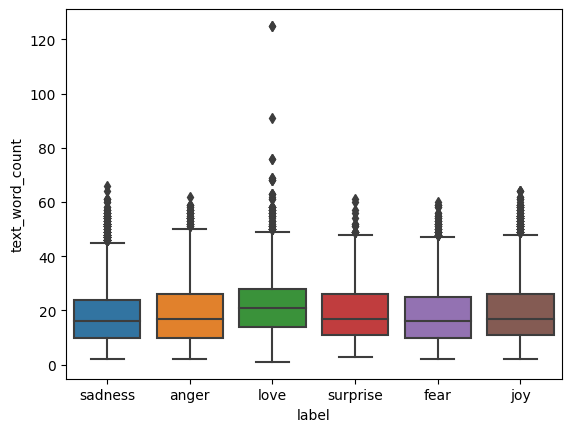

In [ ]:
sns.boxplot(
    x="label",
    y="text_word_count",
    data=dataset
)

### Distribution of top n-grams

In [ ]:
# Creating individual dataframes of different emotions
sadness = dataset[dataset['label']=='sadness']['text']
joy = dataset[dataset['label']=='joy']['text']
love = dataset[dataset['label']=='love']['text']
anger = dataset[dataset['label']=='anger']['text']
fear = dataset[dataset['label']=='fear']['text']
surprise = dataset[dataset['label']=='surprise']['text']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

def get_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [ ]:
# calculating unigrmas for all given emotions
sad_unigrams = get_n_gram(sadness.values,(1,1),7)[2:]
joy_unigrams= get_n_gram(joy.values,(1,1),7)[2:]
love_unigrams= get_n_gram(love.values,(1,1),7)[2:]
anger_unigrams= get_n_gram(anger.values,(1,1),7)[2:]
fear_unigrams= get_n_gram(fear.values,(1,1),7)[2:]
surprise_unigrams= get_n_gram(surprise.values,(1,1),7)[2:]

# calculating bigrams for all given emotions
sad_bigrams = get_n_gram(sadness.values,(2,2),7)[2:]
joy_bigrams= get_n_gram(joy.values,(2,2),7)[2:]
love_bigrams= get_n_gram(love.values,(2,2),7)[2:]
anger_bigrams= get_n_gram(anger.values,(2,2),7)[2:]
fear_bigrams= get_n_gram(fear.values,(2,2),7)[2:]
surprise_bigrams= get_n_gram(surprise.values,(2,2),7)[2:]

# calculating trigrams for all given emotions
sad_trigrams = get_n_gram(sadness.values,(3,3),7)[2:]
joy_trigrams= get_n_gram(joy.values,(3,3),7)[2:]
love_trigrams= get_n_gram(love.values,(3,3),7)[2:]
anger_trigrams= get_n_gram(anger.values,(3,3),7)[2:]
fear_trigrams= get_n_gram(fear.values,(3,3),7)[2:]
surprise_trigrams= get_n_gram(surprise.values,(3,3),7)[2:]

### Visualizing the ngrams for some of the emotions

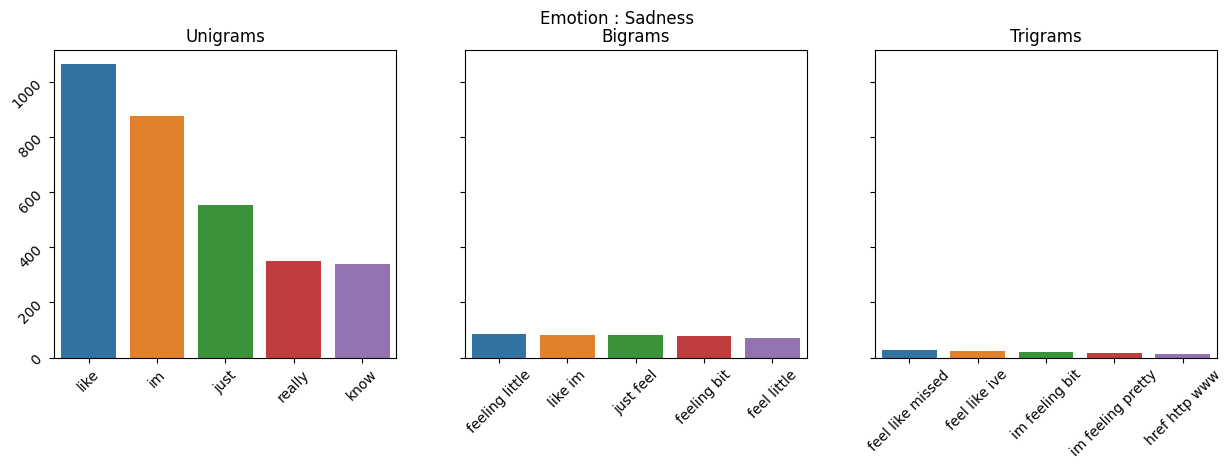

In [ ]:
# figure for sadness label
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)
fig.suptitle('Emotion : Sadness')

sns.barplot(x=list(dict(sad_unigrams).keys()), y=list(dict(sad_unigrams).values()),ax=axes[0],)
axes[0].set_title('Unigrams')
axes[0].tick_params(labelrotation=45)

sns.barplot(x=list(dict(sad_bigrams).keys()), y=list(dict(sad_bigrams).values()),ax=axes[1],)
axes[1].set_title('Bigrams')
axes[1].tick_params(labelrotation=45)

sns.barplot(x=list(dict(sad_trigrams).keys()), y=list(dict(sad_trigrams).values()),ax=axes[2],)
axes[2].set_title('Trigrams')
axes[2].tick_params(labelrotation=45)

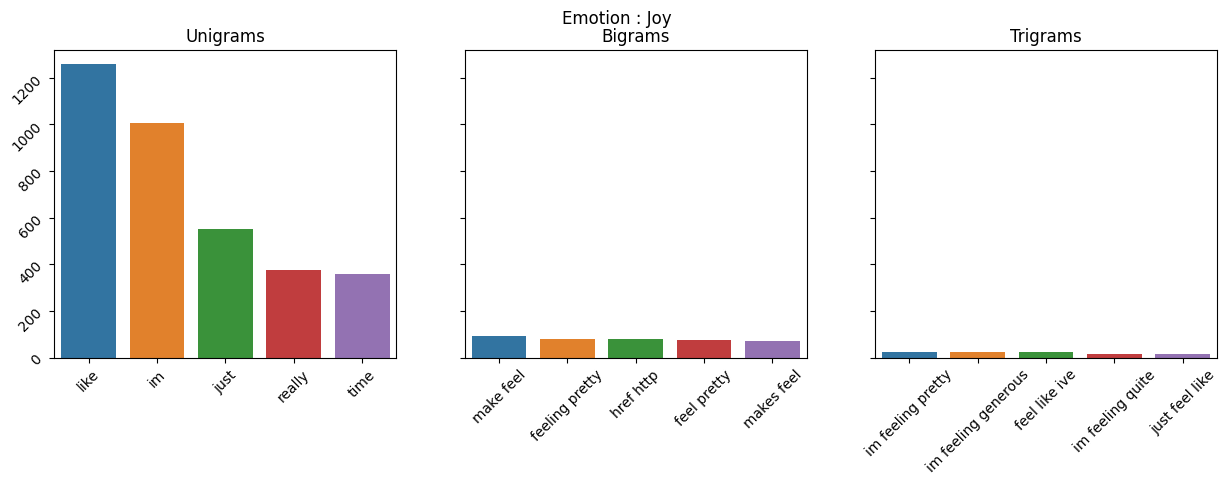

In [ ]:
# figure for Joy label
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)
fig.suptitle('Emotion : Joy')

sns.barplot(x=list(dict(joy_unigrams).keys()), y=list(dict(joy_unigrams).values()),ax=axes[0],)
axes[0].set_title('Unigrams')
axes[0].tick_params(labelrotation=45)

sns.barplot(x=list(dict(joy_bigrams).keys()), y=list(dict(joy_bigrams).values()),ax=axes[1],)
axes[1].set_title('Bigrams')
axes[1].tick_params(labelrotation=45)


sns.barplot(x=list(dict(joy_trigrams).keys()), y=list(dict(joy_trigrams).values()),ax=axes[2],)
axes[2].set_title('Trigrams')
axes[2].tick_params(labelrotation=45)

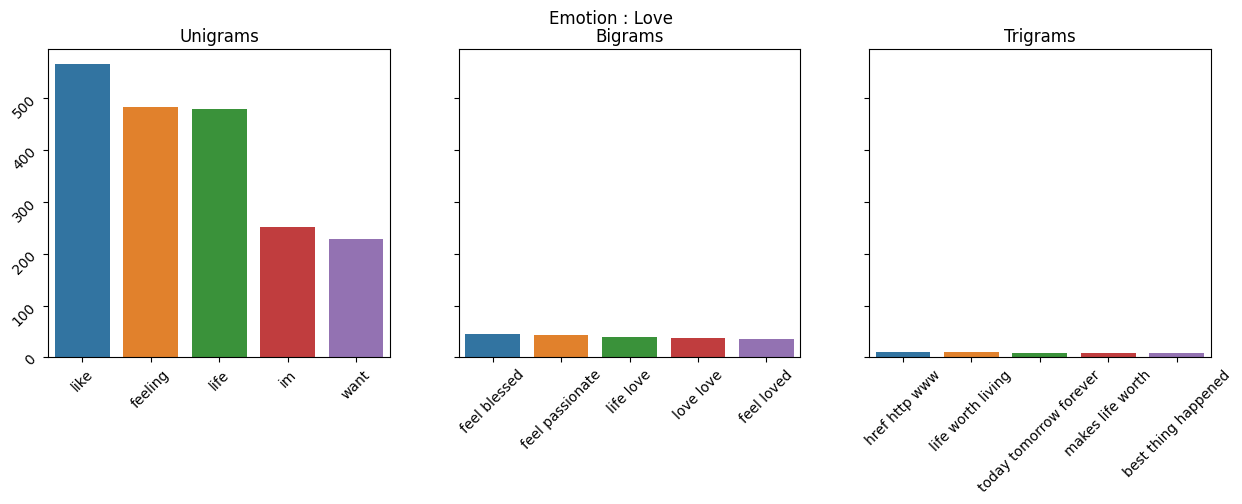

In [ ]:
# figures for Love label
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)
fig.suptitle('Emotion : Love')

sns.barplot(x=list(dict(love_unigrams).keys()), y=list(dict(love_unigrams).values()),ax=axes[0],)
axes[0].set_title('Unigrams')
axes[0].tick_params(labelrotation=45)

sns.barplot(x=list(dict(love_bigrams).keys()), y=list(dict(love_bigrams).values()),ax=axes[1],)
axes[1].set_title('Bigrams')
axes[1].tick_params(labelrotation=45)

sns.barplot(x=list(dict(love_trigrams).keys()), y=list(dict(love_trigrams).values()),ax=axes[2],)
axes[2].set_title('Trigrams')
axes[2].tick_params(labelrotation=45)

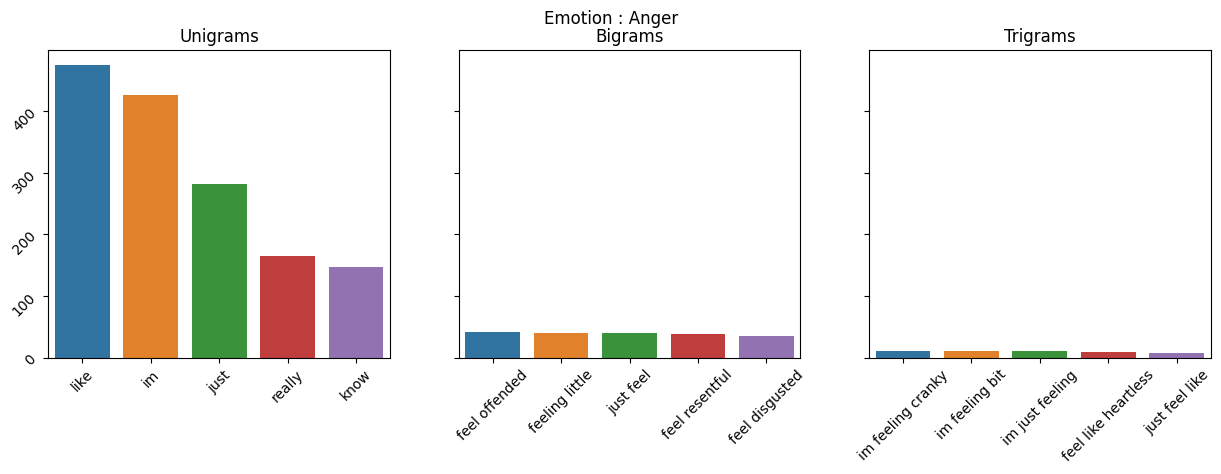

In [ ]:
# figures for Anger label
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)
fig.suptitle('Emotion : Anger')

sns.barplot(x=list(dict(anger_unigrams).keys()), y=list(dict(anger_unigrams).values()),ax=axes[0],)
axes[0].set_title('Unigrams')
axes[0].tick_params(labelrotation=45)

sns.barplot(x=list(dict(anger_bigrams).keys()), y=list(dict(anger_bigrams).values()),ax=axes[1],)
axes[1].set_title('Bigrams')
axes[1].tick_params(labelrotation=45)

sns.barplot(x=list(dict(anger_trigrams).keys()), y=list(dict(anger_trigrams).values()),ax=axes[2],)
axes[2].set_title('Trigrams')
axes[2].tick_params(labelrotation=45)

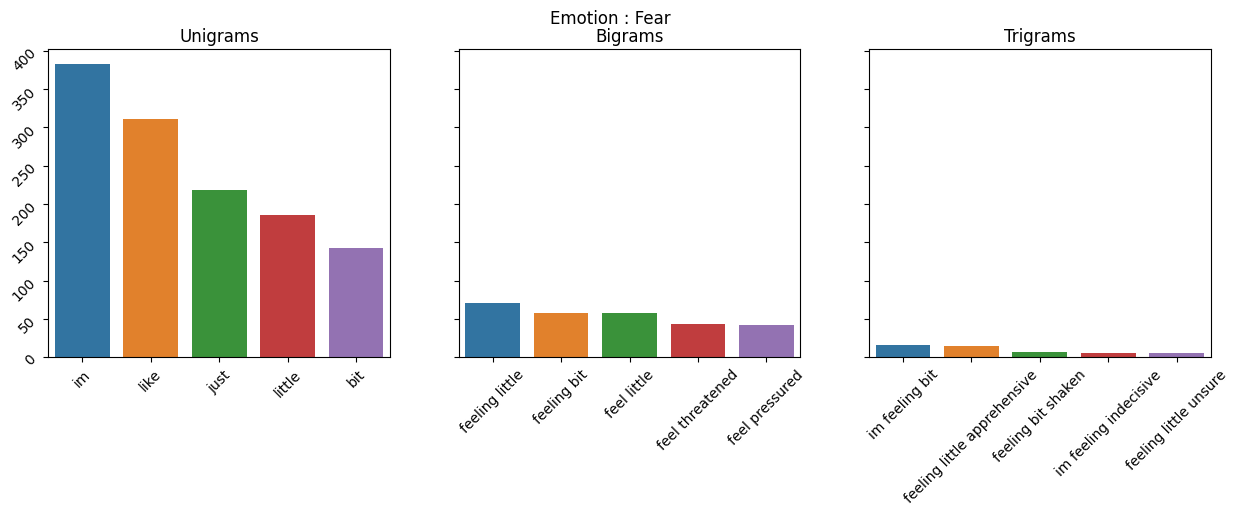

In [ ]:
# figures for Fear label
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)
fig.suptitle('Emotion : Fear')

sns.barplot(x=list(dict(fear_unigrams).keys()), y=list(dict(fear_unigrams).values()),ax=axes[0],)
axes[0].set_title('Unigrams')
axes[0].tick_params(labelrotation=45)

sns.barplot(x=list(dict(fear_bigrams).keys()), y=list(dict(fear_bigrams).values()),ax=axes[1],)
axes[1].set_title('Bigrams')
axes[1].tick_params(labelrotation=45)

sns.barplot(x=list(dict(fear_trigrams).keys()), y=list(dict(fear_trigrams).values()),ax=axes[2],)
axes[2].set_title('Trigrams')
axes[2].tick_params(labelrotation=45)

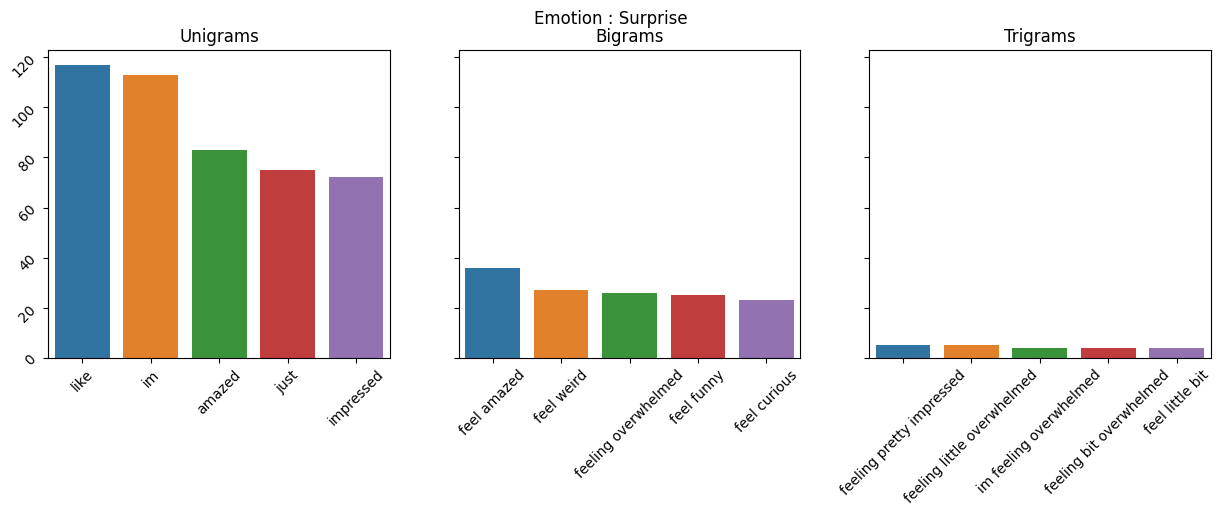

In [ ]:
# figures for Surprise label
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)
fig.suptitle('Emotion : Surprise')

sns.barplot(x=list(dict(surprise_unigrams).keys()), y=list(dict(surprise_unigrams).values()),ax=axes[0],)
axes[0].set_title('Unigrams')
axes[0].tick_params(labelrotation=45)

sns.barplot(x=list(dict(surprise_bigrams).keys()), y=list(dict(surprise_bigrams).values()),ax=axes[1],)
axes[1].set_title('Bigrams')
axes[1].tick_params(labelrotation=45)

sns.barplot(x=list(dict(surprise_trigrams).keys()), y=list(dict(surprise_trigrams).values()),ax=axes[2],)
axes[2].set_title('Trigrams')
axes[2].tick_params(labelrotation=45)

### Downsampling the dataset based on these two labels (joy and sadness)

In [ ]:
sadness_data = dataset[dataset.label == 'sadness']
joy_data = dataset[dataset.label == 'joy']

In [ ]:
sadness_data = sadness_data.sample(2800)
joy_data = joy_data.sample(2800)

<Axes: xlabel='label', ylabel='count'>

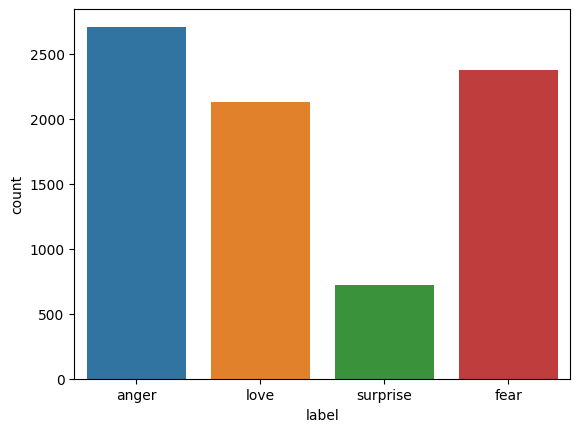

In [ ]:
# Droping joy and sadness data from the dataset
# defining indices
index_def = dataset[(dataset['label']=='sadness') | (dataset['label']=='joy')].index

# droping the label with least count
dataset = dataset.drop(index_def)

# plot the bar chart
sns.countplot(x='label', data=dataset)

<Axes: xlabel='label', ylabel='count'>

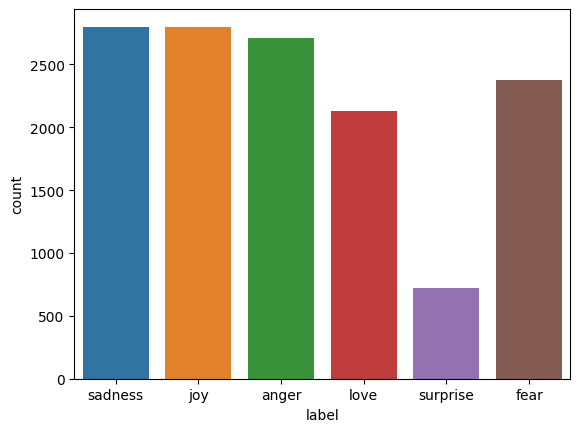

In [ ]:
# Concating the sampled sadness and joy data with the dataset
dataset = pd.concat([sadness_data, joy_data, dataset], axis=0)
sns.countplot(x='label', data=dataset)

### Applying oversampling as the label 'surprise' and 'love' contains significantly low freuency

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [ ]:
features = (dataset['text'].to_numpy()).reshape(-1, 1)
labels = (dataset['label'].to_numpy()).reshape(-1, 1)

In [ ]:
oversampler = RandomOverSampler(random_state=42)
featured_resampled, labels_resampled = oversampler.fit_resample(features, labels)

In [ ]:
featured_resampled = pd.DataFrame(featured_resampled)
featured_resampled = featured_resampled.rename(columns={featured_resampled.columns[0]: 'text'})

labels_resampled = pd.DataFrame(labels_resampled)
labels_resampled = labels_resampled.rename(columns={labels_resampled.columns[0]: 'label'})

dataset = pd.concat([featured_resampled, labels_resampled], axis=1)

<Axes: xlabel='label', ylabel='count'>

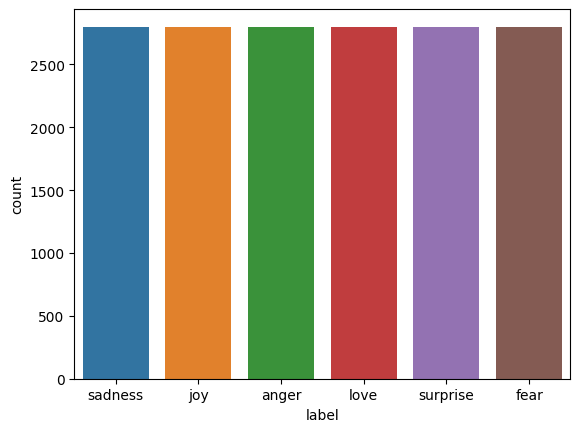

In [ ]:
sns.countplot(x='label', data=dataset)

In [ ]:
dataset.describe()

,text,label
count,16800,16800
unique,13423,6
top,im feeling really weird,sadness
freq,10,2800


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16800 entries, 0 to 16799
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16800 non-null  object
 1   label   16800 non-null  object
dtypes: object(2)
memory usage: 262.6+ KB


### Comapring the dataset

In [ ]:
!pip install datacompy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 372.2/372.2 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.1/169.1 kB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.6/154.6 kB 22.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.4/270.4 kB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.2/144.2 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 19.2 MB/s eta 0:00:00
  Created wheel for fugue-sql-antlr: filename=fugue_sql_antlr-0.1.6-py3-none-any.whl size=158049 sha256=c23a7e52fe9a2f3b608038dcff908873dca137ce28c545bd1ad3452bad33ad74
  Stored in directory: /root/.cache/pip/wheels/c8/54/a1/b294b8b33c6107946b5720b3acb1fce07b97bbbc9677a501ce
Successfully built

In [ ]:
import datacompy

In [ ]:
compare = datacompy.Compare(
    main_dataset,
    dataset,
    join_columns=['text', 'label'],
    abs_tol=0.0001,
    rel_tol=0,
    df1_name='original',
    df2_name='sampled'
)

In [ ]:
print(compare.report())

DataComPy Comparison
--------------------

DataFrame Summary
-----------------

  DataFrame  Columns   Rows
0  original        4  21296
1   sampled        2  16800

Column Summary
--------------

Number of columns in common: 2
Number of columns in original but not in sampled: 2
Number of columns in sampled but not in original: 0

Row Summary
-----------

Matched on: text, label
Any duplicates on match values: Yes
Absolute Tolerance: 0.0001
Relative Tolerance: 0
Number of rows in common: 13,588
Number of rows in original but not in sampled: 7,708
Number of rows in sampled but not in original: 3,212

Number of rows with some compared columns unequal: 0
Number of rows with all compared columns equal: 13,588

Column Comparison
-----------------

Number of columns compared with some values unequal: 0
Number of columns compared with all values equal: 2
Total number of values which compare unequal: 0

Sample Rows Only in original (First 10 Columns)
--------------------------------------------

## Data cleaning

#### Removing stopwords, punctuations, special-characters, numbers and user-handles

In [ ]:
!pip install neattext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 3.5 MB/s eta 0:00:00


In [ ]:
import neattext.functions as nfx

In [ ]:
nfx.STOPWORDS.remove('not')

In [ ]:
dataset['clean_text'] = dataset['text'].apply(nfx.remove_stopwords)  # removing stopwords
dataset['clean_text'] = dataset['clean_text'].apply(nfx.remove_userhandles)  # removing user handles
dataset['clean_text'] = dataset['clean_text'].apply(nfx.remove_numbers)  # removing numbers
dataset['clean_text'] = dataset['clean_text'].apply(nfx.remove_punctuations)  # removing punctuations
dataset['clean_text'] = dataset['clean_text'].apply(nfx.remove_special_characters)  # removing special characters
dataset['clean_text'] = dataset['clean_text'].str.lower()  # converting text to lower case

In [ ]:
dataset.head()

,text,label,clean_text
0,i don t know how i feel about my submissive le...,sadness,know feel submissive learning use firearm
1,i figure my family loves us no matter what but...,sadness,figure family loves matter feel embarrassed mi...
2,i lie in bed or is it a coffin it feels more l...,sadness,lie bed coffin feels like coffin altogether un...
3,i am feeling pretty homesick for maine,sadness,feeling pretty homesick maine
4,i feel fake because i think if you really want...,sadness,feel fake think want good conversation good co...


#### Stemming

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
def stem_sentence(text):
  stemmer = LancasterStemmer()
  words = nltk.word_tokenize(text)
  stemmed_sentence = ' '.join([stemmer.stem(word) for word in words])
  return stemmed_sentence

dataset['clean_text'] = dataset['clean_text'].apply(stem_sentence)

In [ ]:
dataset.head()

,text,label,clean_text
0,i know its too late to crawl back to you but i...,sadness,know lat crawl im feel
1,i know it shouldn t feel unsuccessful but the ...,sadness,know feel unsuccess way com right decid com wi...
2,i am very glad they came and glad i risked fee...,sadness,glad cam glad risk feel fool
3,im enjoying my solitary confinement at home i ...,sadness,im enjoy solit confin hom rar feel lon
4,i feel embarrassed sometimes even an internati...,sadness,feel embarrass intern stud pass cant


#### Lemmatizing

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


**Choices for pos parameter in the lemmatizer**

*   'n' --> nouns (NN, NNS, NNP, NNPS)
*   'v' --> verbs (VB, VBD, VBG, VBN, VBP, VBZ)
*   'a' --> adjectives (JJ, JJR, JJS)
*   'r' --> adverbs (RB, RBR, RBS)

In [ ]:
# finds nltk tag for each word in a sentence
def lemmatizer_tag_finder(sentence):
  tokens = word_tokenize(sentence)
  tag_list = dict(nltk.pos_tag(tokens))

  for tag in tag_list:
    if tag_list[tag].startswith('NN'):
      tag_list[tag] = 'n'
    elif tag_list[tag].startswith('VB'):
      tag_list[tag] = 'v'
    elif tag_list[tag].startswith('JJ'):
      tag_list[tag] = 'a'
    elif tag_list[tag].startswith('RB'):
      tag_list[tag] = 'r'
    else:
      tag_list[tag] = 'others'

  return tag_list

In [ ]:
# returns a lemmatized sentence
def sentence_lemmatizer(sentence):
  words_and_tags = lemmatizer_tag_finder(sentence)
  lemmatized_sentence = []
  lemmatizer = WordNetLemmatizer()

  for word in words_and_tags:
    if words_and_tags[word] == 'others':
      lemmatized_sentence.append(word)
    else:
      lemmatized_sentence.append(lemmatizer.lemmatize(word, pos=words_and_tags[word]))

  return " ".join(lemmatized_sentence)

In [ ]:
pd.options.mode.chained_assignment = None

length = len(dataset['clean_text'])

for index in range(0, length):
  sentence = dataset['clean_text'][index]
  dataset['clean_text'][index] = sentence_lemmatizer(sentence)

In [ ]:
dataset.head()

,text,label,clean_text
0,i feel really socially awkward and dont like t...,sadness,feel socially awkward dont like meet new peopl...
1,i feel useless and helpless and broken,sadness,feel useless helpless broken
2,i used to feel rejected and like it was my fau...,sadness,feel reject like fault overweight
3,i hate the feeling that i am a pathetic loser ...,sadness,hate feeling pathetic loser right
4,i feel so dumb talking about this i feel like ...,sadness,feel dumb talk like whiny emo teenager problem...


### Correcting spell of words in the clean_text

In [ ]:
!pip install autocorrect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 18.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622363 sha256=70c514cedf5a5776b9d442437ec2f740804322849378c9834954d9e7e7b87931
  Stored in directory: /root/.cache/pip/wheels/b5/7b/6d/b76b29ce11ff8e2521c8c7dd0e5bfee4fb1789d76193124343
Successfully built autocorrect


In [ ]:
import re
from autocorrect import Speller

In [ ]:
# create an instance of Speller
spell = Speller(lang='en')

# define function to reduce and correct text
def reduce_and_correct(text):
    words = text.split()
    reduced_words = [spell(word) for word in words]
    reduced_text = ' '.join(reduced_words)
    return reduced_text

In [ ]:
# apply function to input column and create output column
dataset['clean_text'] = dataset['clean_text'].apply(reduce_and_correct)

In [ ]:
dataset.head()

,text,label,clean_text
0,i get why she is concerned because i have been...,sadness,concern pretty honest feel shift
1,i am feeling lighter and less inhibited every ...,sadness,feel light inhibit single day
2,i feel defeated knowing that i cant be like th...,sadness,feel def know cant lik thing felt attain gre s...
3,i am feeling rather jaded because i have alway...,sadness,feel had believe false tru lov christ char hea...
4,i thank him when i feel so utterly defeated,sadness,thank feel ut def


### Applying VADER

In [ ]:
import nltk
nltk.download('vader_lexicon')

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [ ]:
# Load the VADER model
sid = SentimentIntensityAnalyzer()

# Extract the emotional words in the text
def text_emotion(text):
  emotional_words = []
  for word in text.split():
      sentiment_score = sid.polarity_scores(word)
      if sentiment_score["compound"] != 0:
          emotional_words.append(word)
  emotional_string = ' '.join(emotional_words)
  return emotional_string

In [ ]:
dataset['clean_text'] = dataset['clean_text'].apply(text_emotion)

## Ploting cloud of words for sad and joy text

In [ ]:
from wordcloud import WordCloud

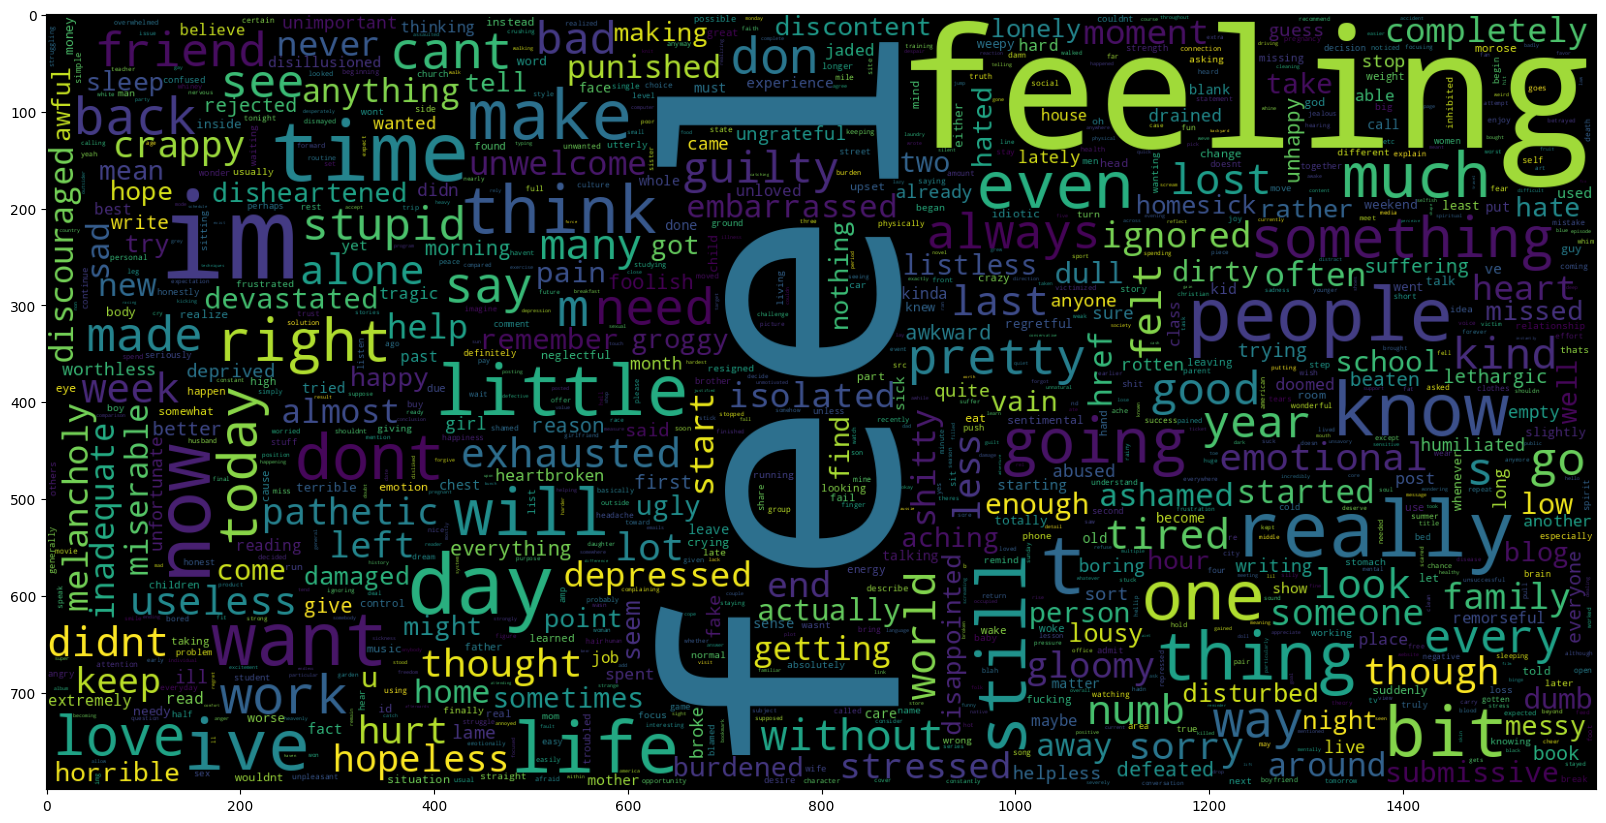

In [ ]:
# getting sad text for cloud of words
data_sadness = dataset[dataset['label'] == 'sadness']
data_sadness = data_sadness['text'][1000:]

#Plot a cloud of words for sad text
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800, collocations=False).generate(" ".join(data_sadness))
plt.figure(figsize = (20,20))
plt.imshow(wc)

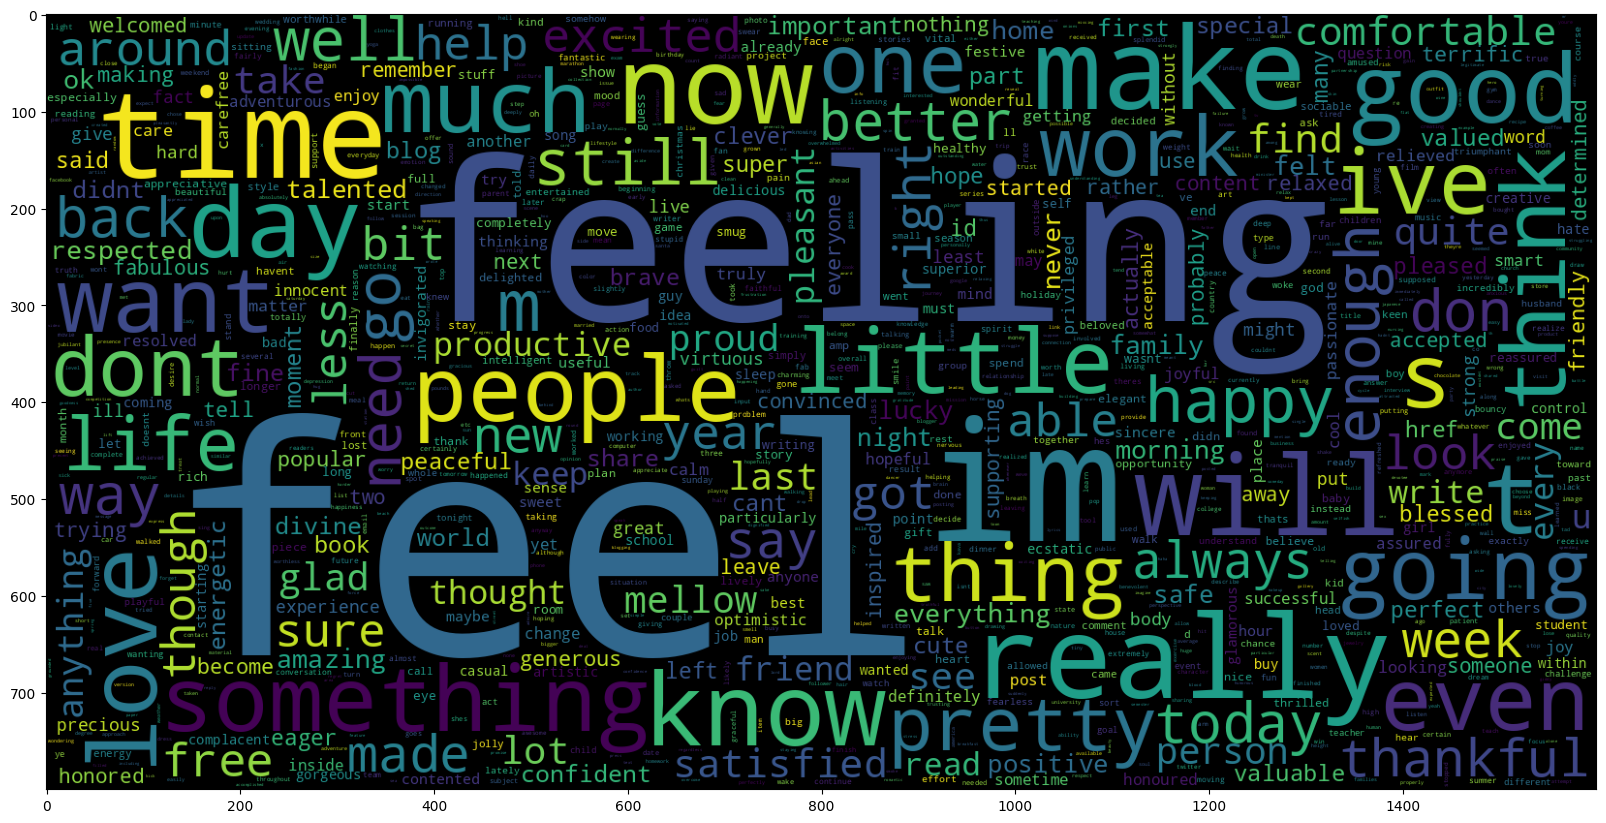

In [ ]:
# getting sad text for cloud of words
data_joy = dataset[dataset['label'] == 'joy']
data_joy = data_joy['text'][1000:]

#Plot a cloud of words for sad text
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800, collocations=False).generate(" ".join(data_joy))
plt.figure(figsize = (20,20))
plt.imshow(wc)

## Feature extraction

In [ ]:
xfeatures = dataset['clean_text']
ylabels = dataset['label']

In [ ]:
xfeatures.head()

0            know feel submissive learning use firearm
1    figure family loves matter feel embarrassed mi...
2    lie bed coffin feels like coffin altogether un...
3                        feeling pretty homesick maine
4    feel fake think want good conversation good co...
Name: clean_text, dtype: object

In [ ]:
ylabels

0         sadness
1         sadness
2         sadness
3         sadness
4         sadness
           ...   
16795    surprise
16796    surprise
16797    surprise
16798    surprise
16799    surprise
Name: label, Length: 16800, dtype: object

### Spliting data for pipeline

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train_p, x_test_p, y_train_p, y_test_p = train_test_split(xfeatures, ylabels, test_size=0.2, random_state = 0)

### Converting text into vectors using TF-IDF

In [ ]:
# vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer()
xfeatures_tfidf = vectorizer.fit_transform(xfeatures)

In [ ]:
xfeatures_tfidf.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
xfeatures_tfidf.shape

(16800, 13528)

### Converting text into vectors using Bag of Words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
xfeatures_bagofwords = cv.fit_transform(xfeatures)

In [ ]:
xfeatures_bagofwords.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
xfeatures_bagofwords.shape

(16800, 13476)

### Converting text into vectors using Doc2Vec

In [ ]:
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument

In [ ]:
tagged_data = [
    TaggedDocument(words=sentence.split(),tags=[i]) for i, sentence in enumerate(xfeatures)
]
model = Doc2Vec(tagged_data, vector_size=100, min_count=1, epochs=50)

In [ ]:
xfeatures_doctovec = []
for text in xfeatures:
  vectorized_sentence = model.infer_vector(text.split())
  xfeatures_doctovec.append(vectorized_sentence)
  vectorized_sentence = None

In [ ]:
xfeatures_doctovec[0]

array([ 0.01757074,  0.18559362, -0.2074785 ,  0.12617613,  0.09426241,
       -0.10333489,  0.03019982,  0.261024  , -0.19417374,  0.02794054,
       -0.1568406 , -0.18647361, -0.07752854,  0.07922878, -0.05114751,
        0.07608865,  0.03812686, -0.20026515, -0.02320851, -0.17812853,
        0.1421818 ,  0.12902902,  0.13805702, -0.1895987 , -0.03814196,
       -0.08290596, -0.06422616, -0.05984546,  0.04649877,  0.08816259,
        0.18173468, -0.11790177,  0.11215737, -0.09572168, -0.06160106,
        0.28210095,  0.16153581, -0.01537376,  0.09626319, -0.26151735,
       -0.13068713, -0.20756929, -0.01694704,  0.07026036,  0.04426088,
       -0.00219794, -0.05702385, -0.01003653,  0.13625126, -0.01108127,
        0.0896562 , -0.15876307,  0.1842143 ,  0.0436899 ,  0.16269334,
        0.04125162, -0.04314286, -0.0508684 , -0.20934954,  0.12072621,
       -0.01129347, -0.07909074, -0.04524161,  0.02370768, -0.1700366 ,
        0.0599735 ,  0.04984791,  0.15998106, -0.03355752,  0.06

### Applying OneHot encoding on labels

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
encoded_labels = encoder.fit_transform(ylabels.to_numpy().reshape(-1,1))
print(encoded_labels.toarray())

[[0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 ...
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]]


### Spliting data into training set and test set

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(xfeatures_bagofwords, ylabels, test_size=0.2, random_state = 0)

## Building models

In [ ]:
# machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
# training all the models on the training set
from pandas.core.generic import RandomState
models = {
    'Logistic Regression': LogisticRegression(solver='newton-cg', multi_class='multinomial', class_weight='balanced', max_iter=10000),
    'Naive Bayes': MultinomialNB(),
    'Bernoulli Naive Bayes': BernoulliNB(),
    'Dicision Tree': DecisionTreeClassifier(),
    'SVM': SVC(kernel='rbf', random_state=0, probability=True),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
}

for model_index in models:
  # training each model on training set
  model = models[model_index]
  model.fit(x_train, y_train)

  # make prediction on training set
  y_train_pred = model.predict(x_train)

  # make prediction on test set
  y_pred = model.predict(x_test)

  print('------------------------------------')

  # training set performance
  print('Training set performance for model ', model_index, ' :')
  print('   Accuracy score : ', accuracy_score(y_train, y_train_pred))
  print('   f1 score       : ', f1_score(y_train, y_train_pred, average='weighted'))
  print('   precision score: ', precision_score(y_train, y_train_pred, average='weighted'))
  print('   recall score   : ', recall_score(y_train, y_train_pred, average='weighted'))

  print('\n')

  # training set performance
  print('Test set performance for model ', model_index, ' :')
  print('   Accuracy score : ', accuracy_score(y_test, y_pred))
  print('   f1 score       : ', f1_score(y_test, y_pred, average='weighted'))
  print('   precision score: ', precision_score(y_test, y_pred, average='weighted'))
  print('   recall score   : ', recall_score(y_test, y_pred, average='weighted'))

------------------------------------
Training set performance for model  Logistic Regression  :
   Accuracy score :  0.9848958333333333
   f1 score       :  0.9848798600374953
   precision score:  0.9850148336216281
   recall score   :  0.9848958333333333


Test set performance for model  Logistic Regression  :
   Accuracy score :  0.9110119047619047
   f1 score       :  0.9105614886650097
   precision score:  0.9110372299235583
   recall score   :  0.9110119047619047
------------------------------------
Training set performance for model  Naive Bayes  :
   Accuracy score :  0.9546875
   f1 score       :  0.9545809481179052
   precision score:  0.9552940939118517
   recall score   :  0.9546875


Test set performance for model  Naive Bayes  :
   Accuracy score :  0.8520833333333333
   f1 score       :  0.8504967379276991
   precision score:  0.8520866585014866
   recall score   :  0.8520833333333333
------------------------------------
Training set performance for model  Bernoulli Naive

## ROC curve

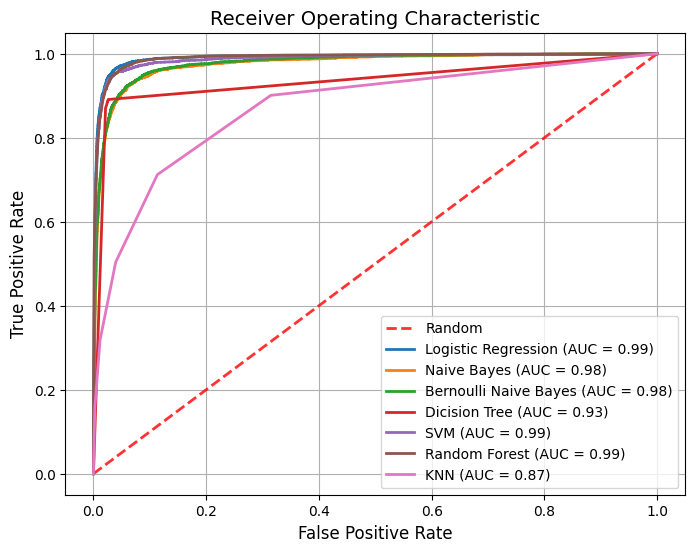

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

def generate_roc_curve(model_dict, X_test, y_test):
    # Convert labels to binary format
    y_test_binary = label_binarize(y_test, classes=np.unique(y_test))

    plt.figure(figsize=(8, 6))
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random', alpha=.8)

    for model_name, model in model_dict.items():
        y_scores = model.predict_proba(X_test)
        n_classes = y_scores.shape[1]

        fpr = dict()
        tpr = dict()
        roc_auc = dict()

        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], y_scores[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Compute micro-average ROC curve and AUC
        fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binary.ravel(), y_scores.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

        plt.plot(fpr["micro"], tpr["micro"], lw=2, label=model_name + ' (AUC = %0.2f)' % roc_auc["micro"])

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title('Receiver Operating Characteristic', fontsize=14)
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

generate_roc_curve(models, x_test, y_test)

## Evaluation parameters table

In [ ]:
# getting the trained model from the models dictionary
model =  models['Logistic Regression']

# making predictions
predictions = model.predict(x_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       anger       0.92      0.90      0.91       580
        fear       0.91      0.88      0.89       548
         joy       0.89      0.87      0.88       527
        love       0.92      0.94      0.93       569
     sadness       0.92      0.88      0.90       576
    surprise       0.91      0.99      0.95       560

    accuracy                           0.91      3360
   macro avg       0.91      0.91      0.91      3360
weighted avg       0.91      0.91      0.91      3360



## Confussion matrix

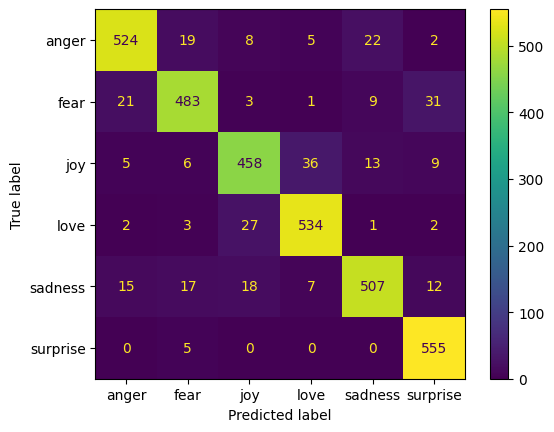

In [ ]:
# setting confusion matrix parameters
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

# showing confusion matrix
disp.plot()
plt.show()

## Plotting evaluation parameters for each models

In [ ]:
# creating dictionaries of evaluation parameters
accuracy_dict = {}
precision_dict = {}
recall_dict = {}
f1_score_dict = {}

for model_name, trained_model in models.items():
  y_pred = trained_model.predict(x_test)
  accuracy_dict[model_name] = accuracy_score(y_test, y_pred)
  f1_score_dict[model_name] = f1_score(y_test, y_pred, average='weighted')
  precision_dict[model_name] = precision_score(y_test, y_pred, average='weighted')
  recall_dict[model_name] = recall_score(y_test, y_pred, average='weighted')

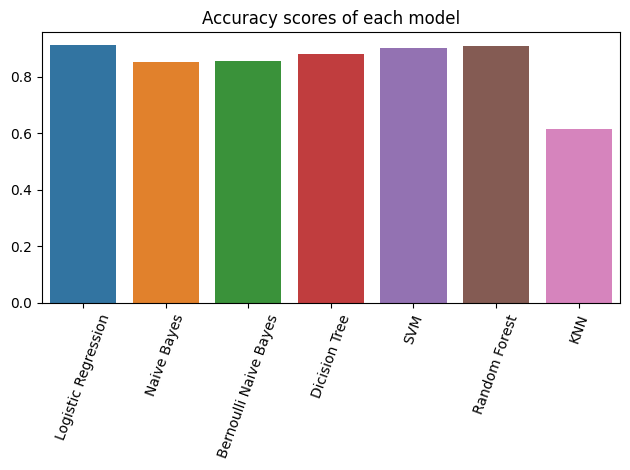

In [ ]:
# ploting accuracy score of each model

model_names = list(accuracy_dict.keys())
model_accuracy = list(accuracy_dict.values())
sns.barplot(x=model_names, y=model_accuracy).set_title('Accuracy scores of each model')
plt.xticks(rotation=70)
plt.tight_layout()

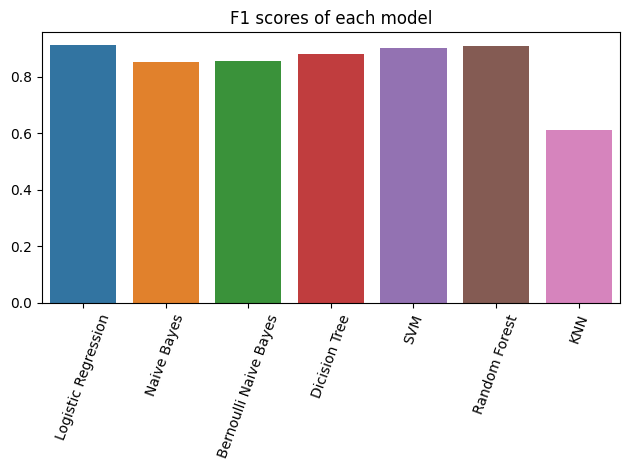

In [ ]:
# ploting F1 score of each model

model_names = list(f1_score_dict.keys())
model_f1_score = list(f1_score_dict.values())
sns.barplot(x=model_names, y=model_f1_score).set_title('F1 scores of each model')
plt.xticks(rotation=70)
plt.tight_layout()

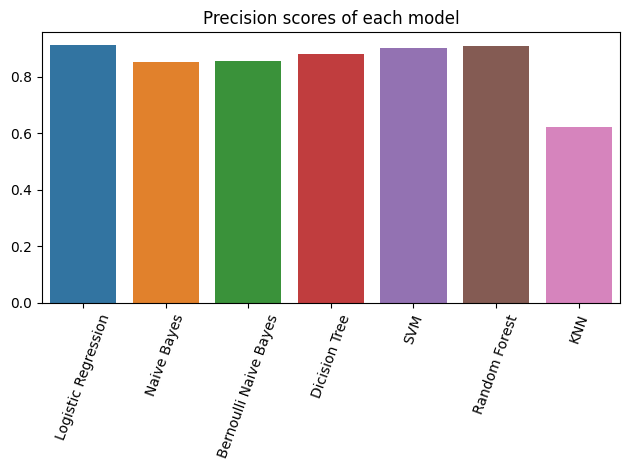

In [ ]:
# ploting precision score of each model

model_names = list(precision_dict.keys())
model_precision_score = list(precision_dict.values())
sns.barplot(x=model_names, y=model_precision_score).set_title('Precision scores of each model')
plt.xticks(rotation=70)
plt.tight_layout()

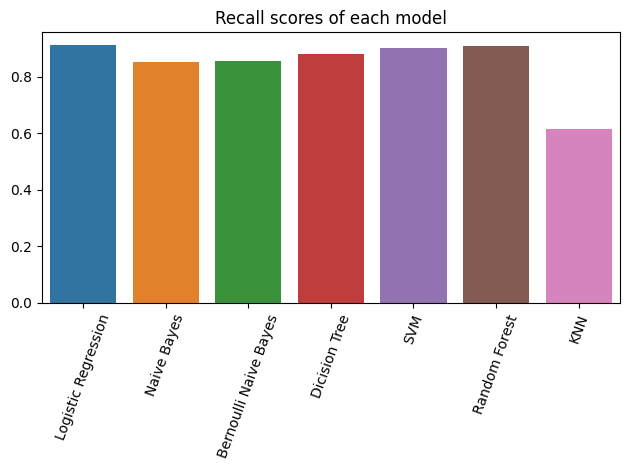

In [ ]:
# ploting recall score of each model

model_names = list(recall_dict.keys())
model_recall_score = list(recall_dict.values())
sns.barplot(x=model_names, y=model_recall_score).set_title('Recall scores of each model')
plt.xticks(rotation=70)
plt.tight_layout()

## Building pipeline using best model based on the accuracy

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
pipeline_model = Pipeline(steps = [
    ('vectorizer', CountVectorizer()),
    ('Logistic Regression', LogisticRegression(
        solver='newton-cg',
        multi_class='multinomial',
        class_weight='balanced',
        max_iter=10000
    ))
])

In [ ]:
pipeline_model.fit(x_train_p, y_train_p)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('Logistic Regression',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    multi_class='multinomial',
                                    solver='newton-cg'))])

In [ ]:
pipeline_model.score(x_test_p, y_test_p)

0.9110119047619047

In [ ]:
text = 'I am feeling good.'
print("The emotion detected from the sentence is: ", pipeline_model.predict([text])[0])

probability = pipeline_model.predict_proba([text])[0]
print("The probability of each output label: ")
print(probability)
print(pipeline_model.classes_)


The emotion detected from the sentence is:  joy
The probability of each output label: 
[0.09963869 0.07903325 0.52627907 0.08212405 0.19306669 0.01985825]
['anger' 'fear' 'joy' 'love' 'sadness' 'surprise']


In [ ]:
output_label = pd.DataFrame(pipeline_model.classes_, columns=['labels'])
proba = pd.DataFrame(probability, columns=['confidences'])
confidence_table = pd.concat([output_label, proba], axis=1)
confidence_table

,labels,confidences
0,anger,0.099639
1,fear,0.079033
2,joy,0.526279
3,love,0.082124
4,sadness,0.193067
5,surprise,0.019858


## Saving the trained model

In [ ]:
import joblib

In [ ]:
pipeline_file = open('91%_logistic_regression_emotion_classifier_16_June_2023.pkl', 'wb')
joblib.dump(pipeline_model, pipeline_file)
pipeline_file.close()